In [143]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns;sns.set_style("ticks")
import scipy
from operator import itemgetter
import os

data_set = "/Users/annasintsova/git_repos/HUTI-RNAseq/results/"\
           "differential_expression_analysis/deseq_norm_counts.csv"
outdir = "/Users/annasintsova/git_repos/HUTI-RNAseq/results/regulon_analysis/"
regulatory_network = os.path.join(outdir, "regulatory_network.csv")
                                      
col1 = "#f34236"
col2 = "#d6c571"
col3 = "#88bc67"
col4 = "#2e8174"
col5 = "#143969"
clrs = [col1, col2, col3, col4, col5]
my_cmap = LinearSegmentedColormap.from_list('custom blue', [col5, col4, col2,col1], N=256)
ur = "URINE"
uti = "PATIENT"
join = " | "


In [144]:
counts = pd.read_csv(data_set, index_col=0)
counts.head()

,HM01_UR,HM03_UR,HM06_UR,HM07_UR,HM14_UR,HM17_UR,HM43_UR,HM54_UR,HM56_UR,HM57_UR,...,HM14_UTI,HM17_UTI,HM43_UTI,HM54_UTI,HM56_UTI,HM57_UTI,HM60_UTI,HM66_UTI,HM68_UTI,HM86_UTI
b0002,1809.173226,1485.090948,1034.399500,1882.376734,1672.556833,1734.666078,1299.616272,1543.683343,1807.172459,952.242212,...,1777.945422,1036.803096,1944.636593,604.838027,1042.714412,530.767012,791.081193,925.520273,554.492397,1487.268019
b0003,638.119239,386.325207,543.177820,410.247872,556.587158,557.246473,528.651856,793.521540,1544.577527,432.660989,...,421.407595,343.890136,444.460331,265.424066,761.078998,237.656871,288.637732,252.414620,248.681439,1280.454784
b0004,481.900793,471.342594,385.642360,372.514702,471.173392,551.062929,652.456361,722.918076,892.906532,471.076628,...,371.374252,431.145842,586.726883,200.829714,373.905689,229.734975,224.496014,168.276413,194.912479,1031.512926
b0006,744.472445,856.634156,1241.946217,967.414258,931.475941,1170.872322,1213.217941,1031.040801,978.762929,1190.496784,...,1226.169257,1006.006965,3692.062311,1458.657922,1275.500857,855.564735,737.629761,1262.073099,2990.898385,905.127060
b0007,174.528339,191.999752,162.536585,177.158572,157.471925,243.704398,233.374802,250.949268,252.962263,363.202409,...,49.328648,61.592263,61.812364,120.967605,66.338106,166.359810,171.044582,84.138207,97.456240,61.277996


In [171]:
15/20

0.75

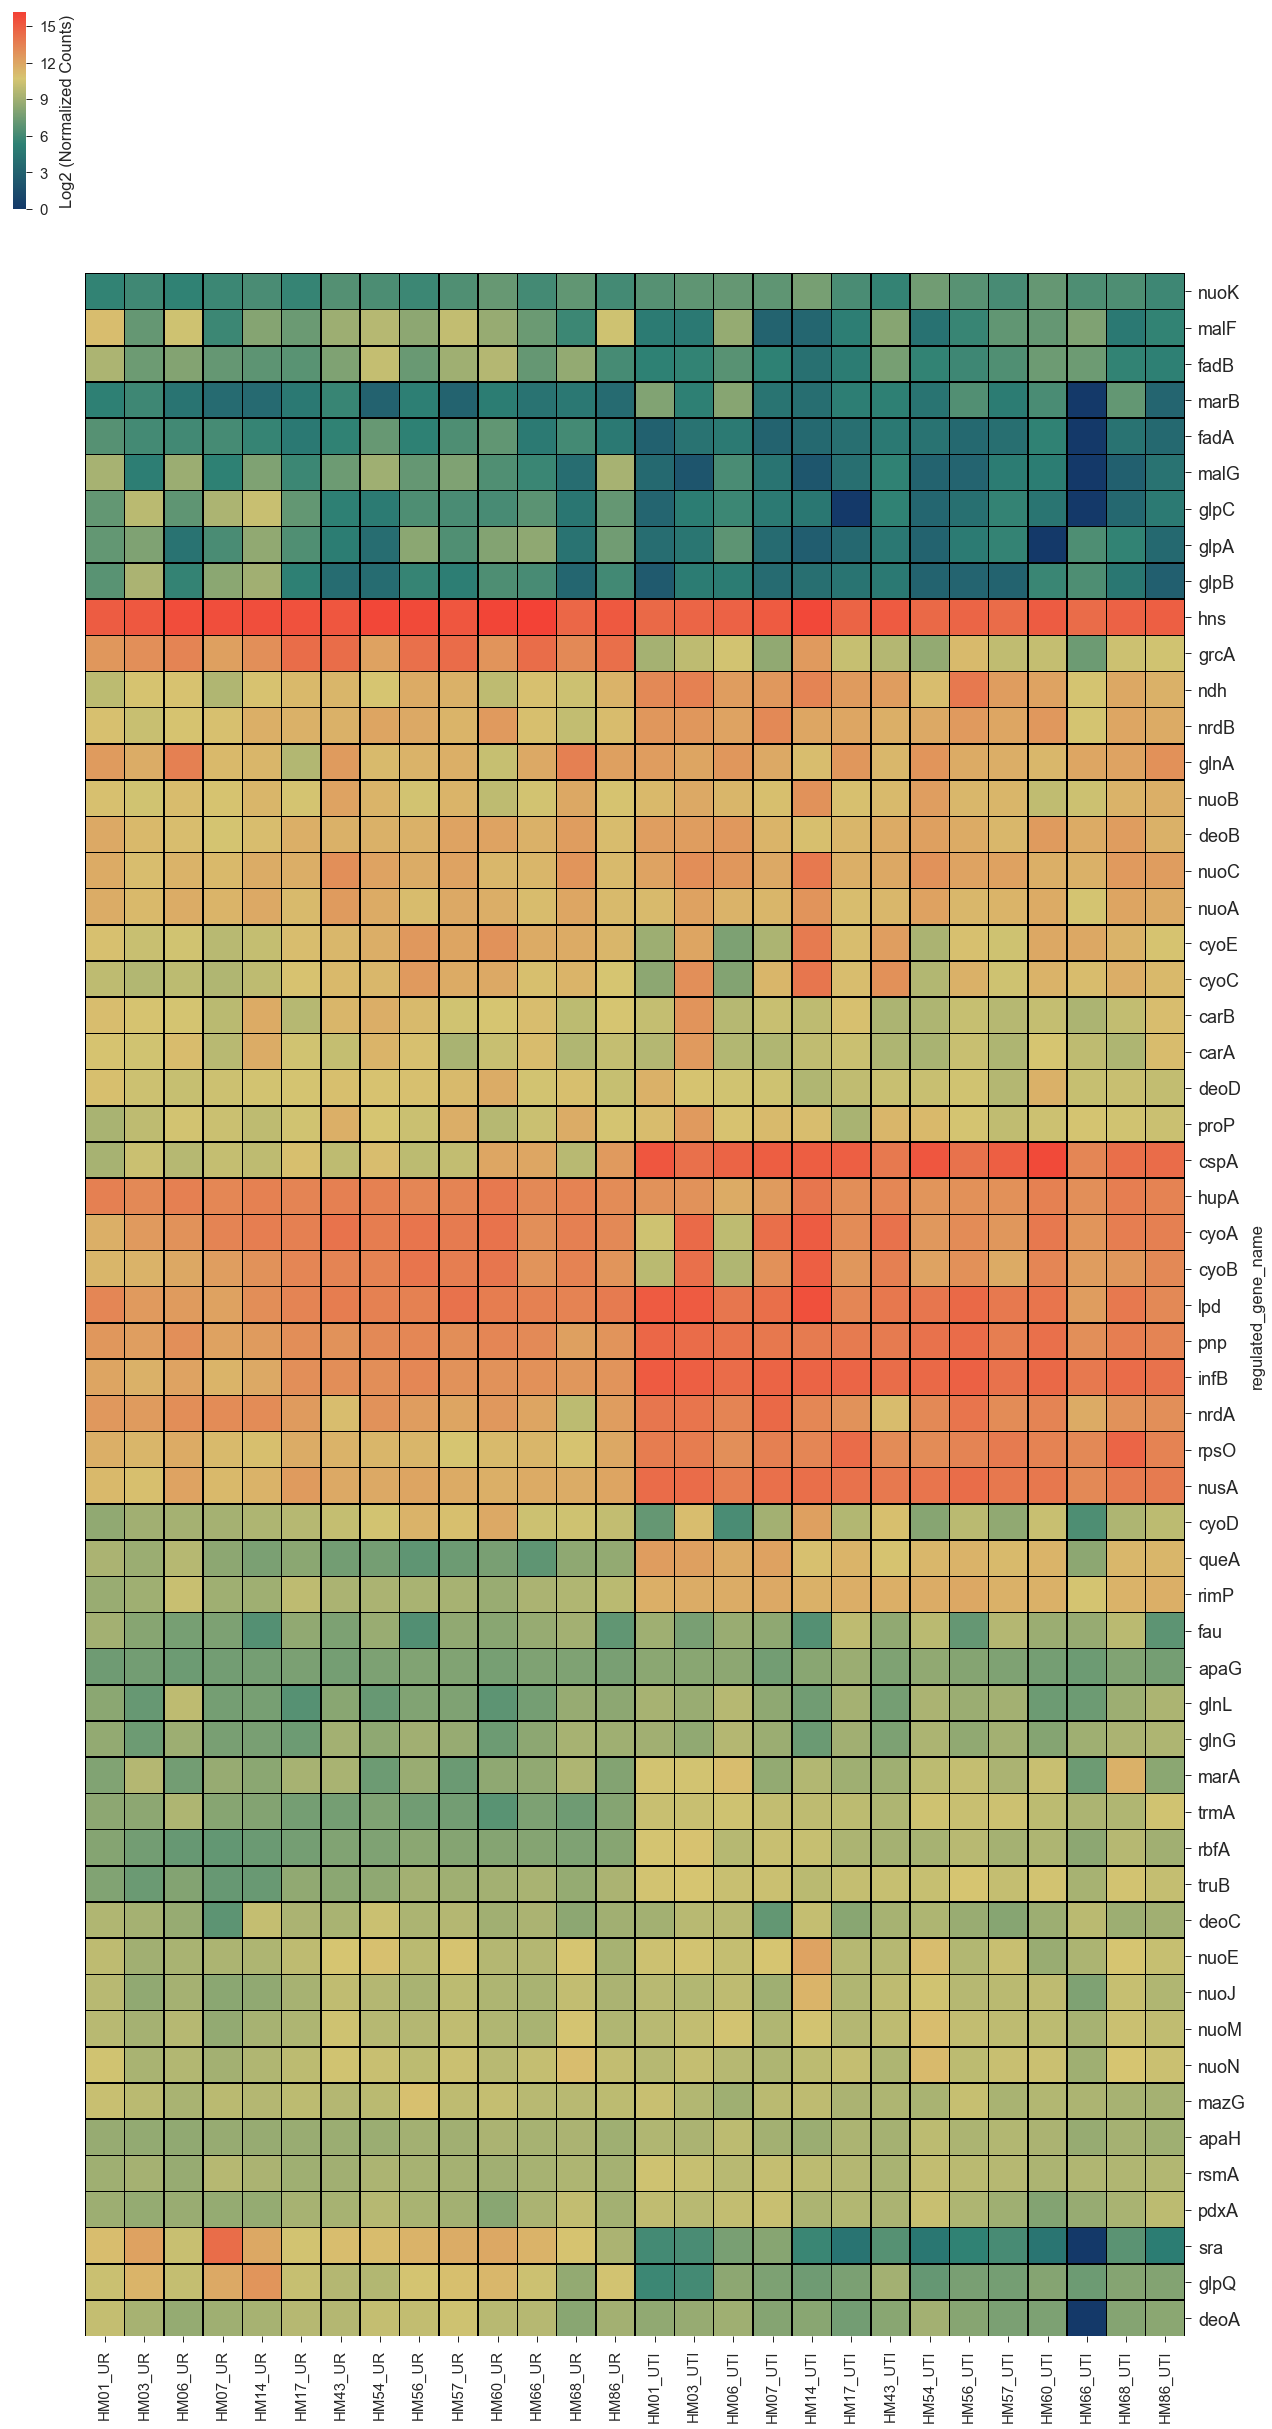

In [203]:
def plot_regulon(regulatory_network_file, counts_file, regulator, function, linkage=""):
    counts = pd.read_csv(counts_file, index_col=0)
    
    r_net = pd.read_csv(regulatory_network_file, index_col=0, header=0,
                        names = ["regulator", "regulated_gene_name", 
                        "regulated_bnum", "regulator_function"])
    r_net = r_net.drop_duplicates()
    reg_groups = r_net.groupby(["regulator", "regulator_function"])
    
    group = reg_groups.get_group((regulator, function))
           
    group = (pd.merge(group, counts, how="inner", left_on="regulated_bnum",
                     right_index=True)
             .set_index("regulated_gene_name"))
    
    pa_mat = group.iloc[:,3:]
    strain_cluster = scipy.cluster.hierarchy.linkage(pa_mat.T, method="average")
    x, y = pa_mat.shape
    g = sns.clustermap(np.log2(pa_mat +1),  cmap = my_cmap, linewidths=0.5, linecolor='black',
                        col_cluster=False,
                    cbar_kws={'label': 'Log2 (Normalized Counts)'},
                  figsize=(y*.75,x*0.75))
    g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation = 0, fontsize = 18);
    g.ax_row_dendrogram.set_visible(False)
plot_regulon(regulatory_network, data_set, "fis", "activator")

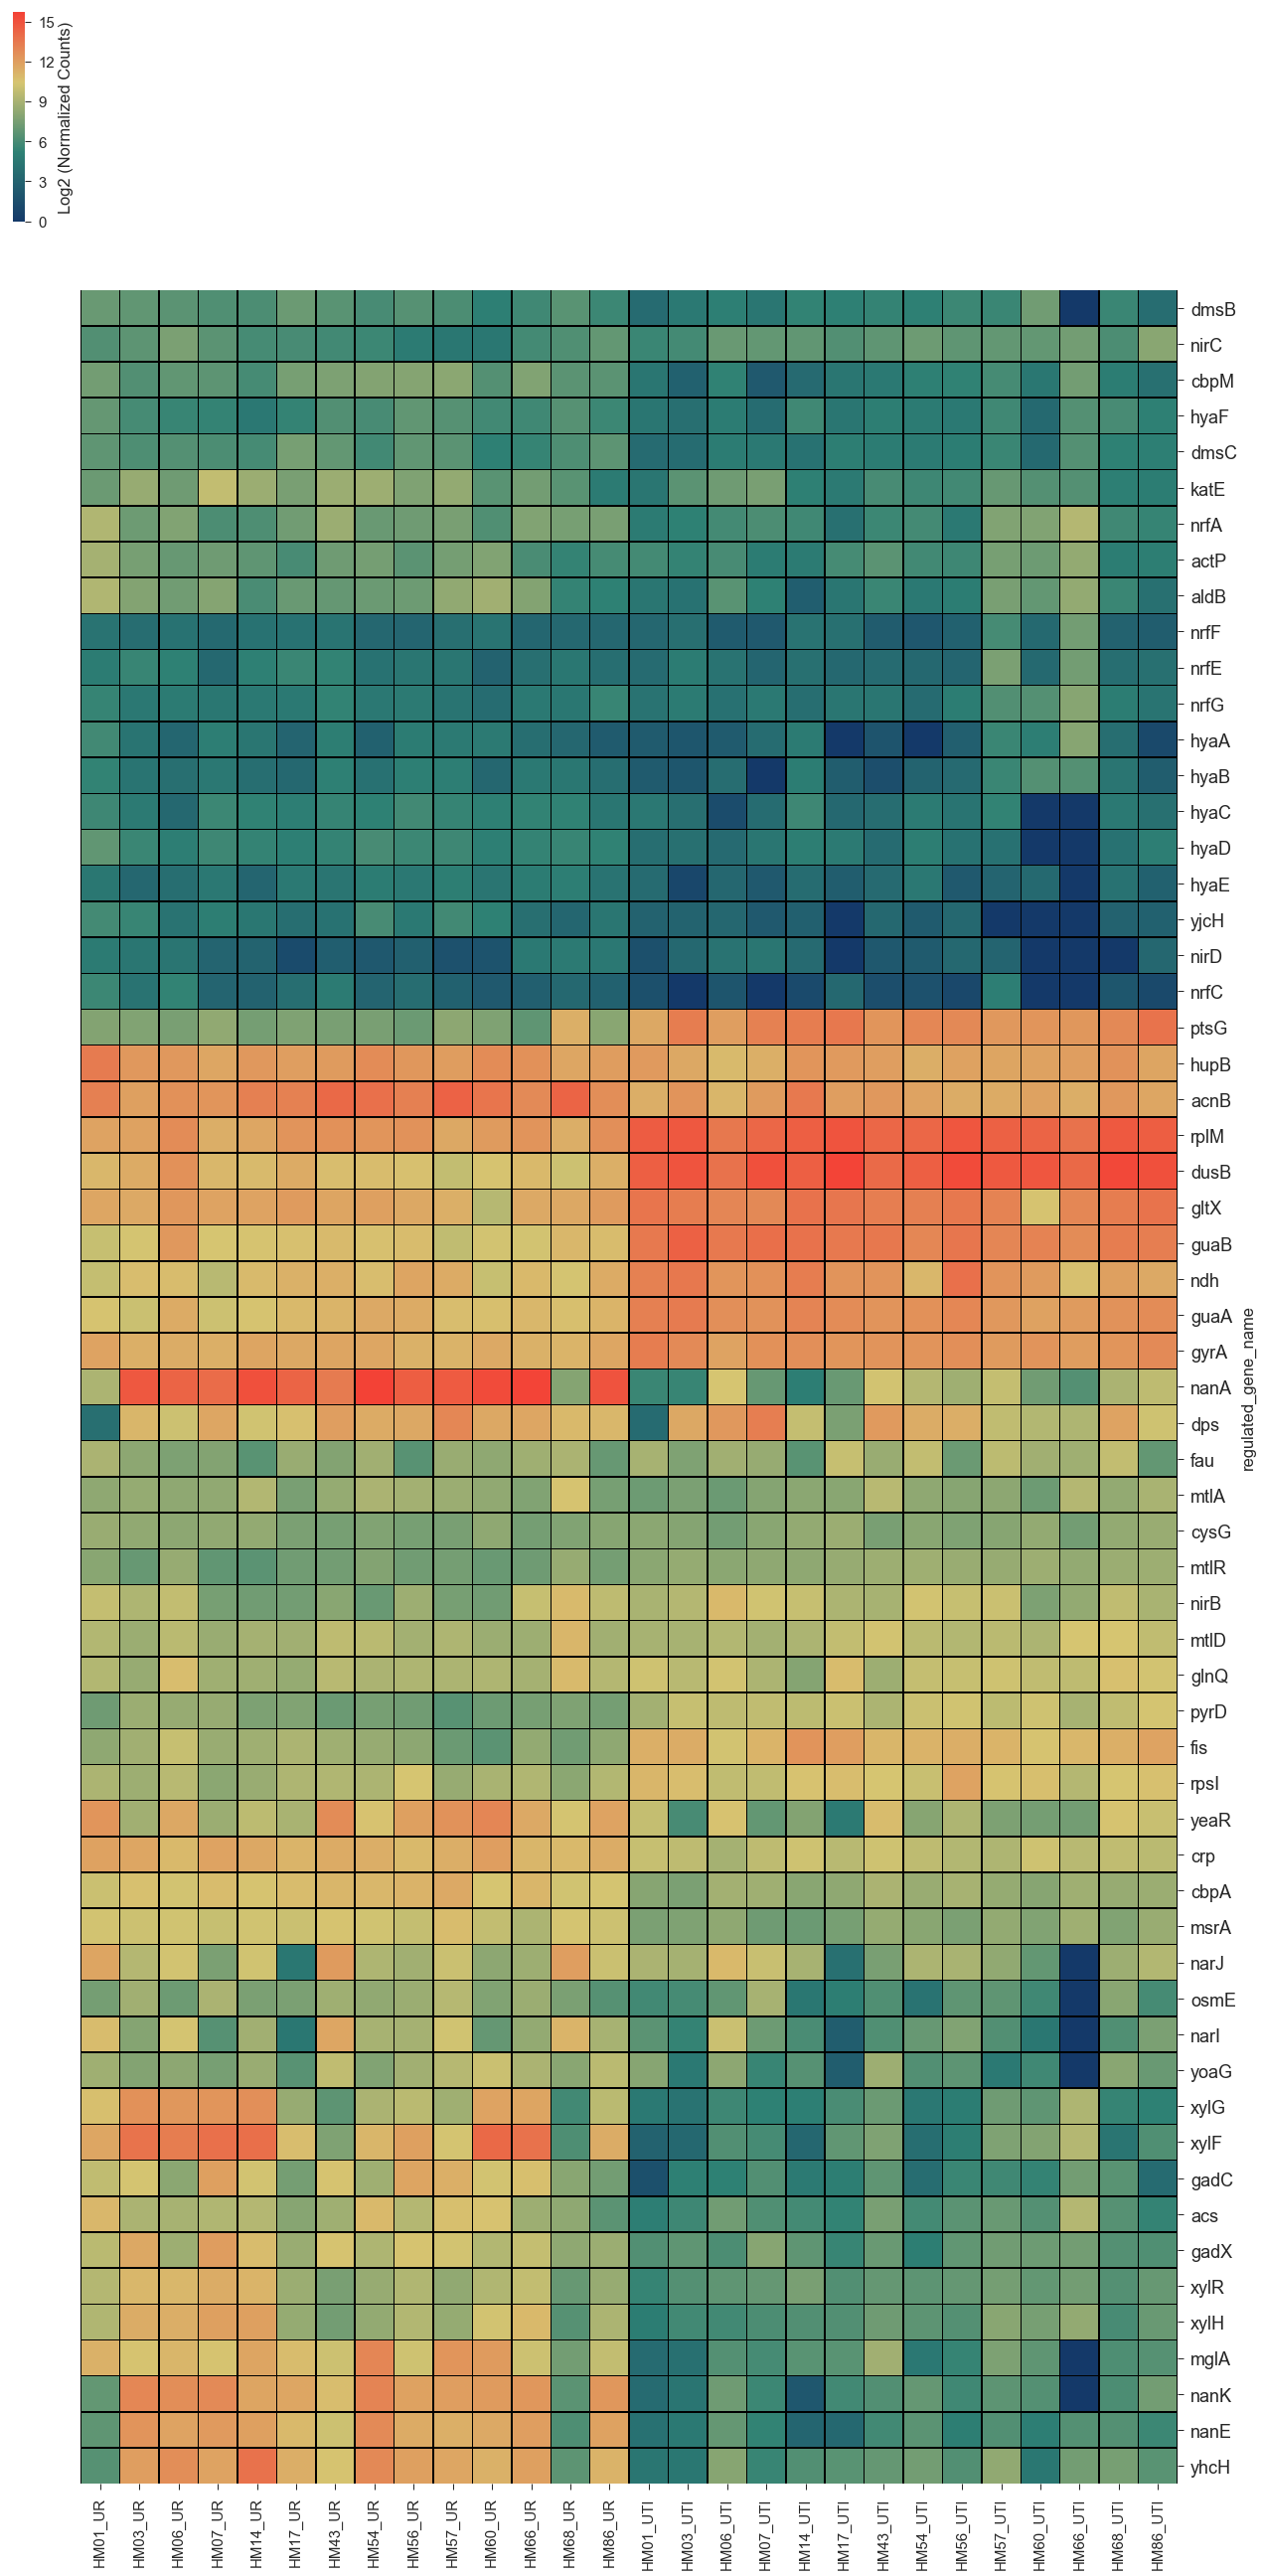

In [204]:
plot_regulon(regulatory_network, data_set, "fis", "repressor")

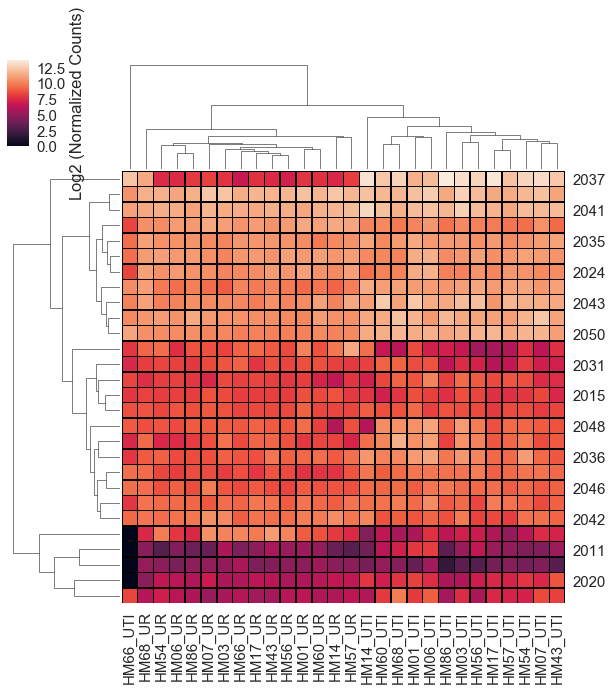

In [83]:
#sns.set_style("white")
#sns.set_context("notebook", font_scale=1.5)
#fig = plt.figure(figsize=(30,30))
sns.clustermap(np.log2(up_data+1),  linewidths=0.5, linecolor='black',
            cbar_kws={'label': 'Log2 (Normalized Counts)'})
#ax = fig.gca()
#ax.set_xticklabels("")
#n = os.path.join(figures_folder, today+"_figure_4a_v2.png")
#fig.savefig(fn, dpi=500, bbox_inches="tight")